# CSCI 532 Semester Project

James Avery

## Problem #3

Write a C/C++/Matlab/Java program to compute insertion sort and merge sort. (You can use the code from the textbooks by Deitel and Deitel or from the web.) Obtain the run time of both routines.

The input data should be an int array containing random element values (between, say, 0 and 1023). Obtain run time T with 1D (input) array of size of $n = 16$, $256$, $4096$, $65536$, $1048576$ (i.e. $2^p$, where $p = 4$, $8$, $12$, $16$, $20$). The run time for each $n$ should be averaged with about $\left\lfloor{\frac{512}{p \times p}}\right\rfloor$ runs. Each run for a given $n$ should use a different random input.

Plot (with Excel, Matlab, or other available tools) the run time for both routines on one plot, with the $x$ axis in $p$ values, and $y$ axis in $\log{T}$. Label on the plot which curve is for insertion sort and which is for merge sort.

Submit C/C++ programs and plot, with instructions in readme.txt on how to build and run the program. (Include the Dev-C++/MS Visual Studio/Java NetBeans project file.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

## Step 1: Run the program

In [2]:
#Run the program
%time !./532-project equal-batches


 Insertion Sort
16	323	219	219	197	241	247	185	261	190	188	184	220	206	198	180	214	170	186	176	221	186	181	198	221	
256	14368	14619	15121	13803	15224	15375	15052	15155	16258	15361	16473	17615	16113	15091	14971	15741	16100	15540	15817	15177	14355	15519	14131	15164	
4096	3500624	3519587	3433951	3347453	3358139	3344035	3532789	3395669	3350328	4506557	5193180	3277136	3513598	3757386	3746573	4594054	3393162	3509986	3469746	3563083	3475979	3315264	3388452	3422763	
65536	885131846	854674417	857960436	852298956	856758480	850376936	849961599	858317980	864701809	854482712	851861326	853417450	847104323	849970656	865838685	854207516	854817488	855983751	851502364	849078270	865059315	862161426	853192325	860242941	
1048576	222640881918	221932003979	222198245922	222314494544	220668927480	226253883875	223503744245	227312074605	224496757866	223117394485	224703525568	223759311095	223896592579	224453041273	225739006178	224608930652	225251049372	224126212022	224360842168	225544010930	224501757348	22519640

Just to be sure, list the contents of the directory to make sure the data files exist.

In [3]:
!ls *.csv

insertionsort.csv  mergesort.csv


## Step 2: Prepare the data for processing

Load the run-times into numpy arrays for processing.

**Note that this will only work if the program was run with the `equal-batches` flag set.** Numpy requires that each row have the same number of columns.

In [4]:
insertion = np.loadtxt(
    './insertionsort.csv', dtype='int64', delimiter=',')
merge = np.loadtxt(
    './mergesort.csv', dtype='int64', delimiter=',')

The data is stored in rows of the format $n, r_1, r_2, \ldots r_i$, where $n$ is the size of the array, and $r_i$ is the run-time in nanoseconds of the $i^{\textrm{th}}$ run, so a little data muging is necessary. The first column becomes the labels, and the subsequent columns are retained as data.

In [5]:
insertion_labels = insertion[:, 0]
insertion = insertion[:, 1:]
merge_labels = merge[:, 0]
merge = merge[:, 1:]

The `*_labels` arrays *should* contain exactly the same data. If they don't, something has gone wrong. If they do, then it's safe to remove one of them and just use the other for all labels.

In [6]:
if not np.all(insertion_labels == merge_labels):
    raise ValueError(
        "The two data sets were not tested on arrays of the same sizes." +
            "\n\tInsertion Sort was tested with arrays of sizes:\n\t\t" +
            str(insertion_labels) +
            "\n\tMerge Sort was tested with arrays of sizes:\n\t\t" +
            str(merge_labels))
else:
    labels = insertion_labels
    del merge_labels

Find the means of each run-time

In [7]:
insertion_mean, merge_mean = insertion.mean(axis=1), merge.mean(axis=1)

## Step 3: Graph results

Text(0.5,1,'Run times of Insertion Sort and Merge Sort compared')

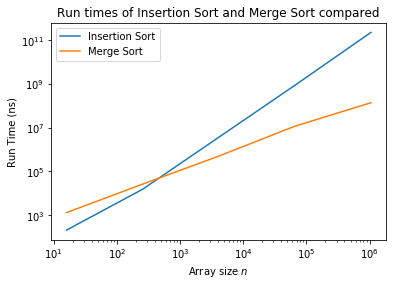

In [8]:
plt.plot(labels, insertion.mean(axis=1), label='Insertion Sort')
plt.plot(labels, merge.mean(axis=1), label='Merge Sort')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Array size $n$")
plt.ylabel('Run Time (ns)')
plt.title("Run times of Insertion Sort and Merge Sort compared")